In [1]:
import tensorflow as tf 


In [2]:
print(tf.__version__)

2.14.0


In [4]:
mnist = tf.keras.datasets.mnist
print(mnist)

<module 'keras.api._v2.keras.datasets.mnist' from 'C:\\Users\\tanma\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\keras\\api\\_v2\\keras\\datasets\\mnist\\__init__.py'>


In [6]:
(xtrain , ytrain) , (xtest ,ytest) = mnist.load_data()
xtrain , xtest = xtrain / 255.0 , ytrain / 255.0

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28 , 28)) ,
    tf.keras.layers.Dense(128 , activation = 'relu') ,
    tf.keras.layers.Dropout(0.2)  , 
    tf.keras.layers.Dense(10)
])


In [12]:
prediction = model(xtrain[:1]).numpy()
tf.nn.softmax(prediction).numpy()

array([[0.04794595, 0.06156087, 0.1856683 , 0.06185215, 0.04715944,
        0.11168188, 0.0682478 , 0.09925772, 0.12228521, 0.1943406 ]],
      dtype=float32)

In [13]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True)

In [15]:
loss_fn(ytrain[:1] , prediction).numpy()

2.1921008

In [16]:
model.compile(optimizer= 'adam' , loss= loss_fn , metrics= ['accuracy'])

In [17]:
model.fit(xtrain , ytrain ,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3044 - accuracy: 0.9126
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1432 - accuracy: 0.9583
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1092 - accuracy: 0.9665
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0867 - accuracy: 0.9730
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0761 - accuracy: 0.9763


In [6]:
import numpy as np
import cv2 as cv
import glob

criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)

objp = np.zeros((6*7, 3), np.float32)
objp[:, :2] = np.mgrid[0:7, 0:6].T.reshape(-1, 2)

objpoints = []  
imgpoints = []  

images = glob.glob('*.jpg')

for fname in images:
    img = cv.imread(fname)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    ret, corners = cv.findChessboardCorners(gray, (7, 6), None)

    if ret == True:
        objpoints.append(objp)

        corners2 = cv.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria)
        imgpoints.append(corners2)

        cv.drawChessboardCorners(img, (7, 6), corners2, ret)
        cv.imshow('img', img)
        cv.waitKey(500)

cv.destroyAllWindows()


error: OpenCV(4.8.1) :-1: error: (-5:Bad argument) in function 'drawChessboardCorners'
> Overload resolution failed:
>  - drawChessboardCorners() takes at most 4 arguments (6 given)
>  - drawChessboardCorners() takes at most 4 arguments (6 given)


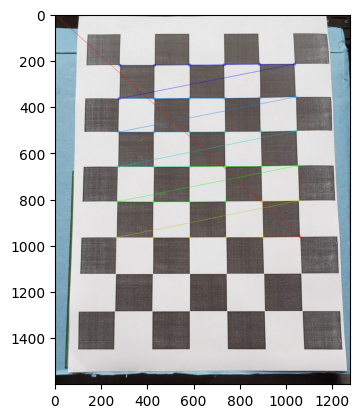

In [25]:

import numpy as np
import cv2 as cv
import glob
import matplotlib.pyplot as plt


criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)

objp = np.zeros((6*7, 3), np.float32)
objp[:, :2] = np.mgrid[0:7, 0:6].T.reshape(-1, 2)

objpoints = []  
imgpoints = [] 

images = glob.glob('./image/chess.jpg')

for fname in images:
    img = cv.imread(fname)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    ret, corners = cv.findChessboardCorners(gray, (6, 6), None)

    if ret == True:
        objpoints.append(objp)

        corners2 = cv.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria)
        imgpoints.append(corners2)

        cv.drawChessboardCorners(img, (7, 6), corners2, ret)
        cv.imshow('img', img)
        cv.waitKey(500)

cv.destroyAllWindows()
plt.imshow(img)


In [26]:
heiglight the drawn line more its not visible 

import numpy as np
import cv2 as cv
import glob
import matplotlib.pyplot as plt
# Termination criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# Prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*7, 3), np.float32)
objp[:, :2] = np.mgrid[0:7, 0:6].T.reshape(-1, 2)

# Arrays to store object points and image points from all the images
objpoints = []  # 3D points in real-world space
imgpoints = []  # 2D points in image plane

images = glob.glob('./image/chess.jpg')

for fname in images:
    img = cv.imread(fname)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv.findChessboardCorners(gray, (6, 6), None)

    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)

        corners2 = cv.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria)
        imgpoints.append(corners2)

        # Draw and display the corners
        cv.drawChessboardCorners(img, (7, 6), corners2, ret)
        cv.imshow('img', img)
        cv.waitKey(500)

cv.destroyAllWindows()
plt.imshow(img)


SyntaxError: invalid syntax (645380720.py, line 1)